<a href="https://colab.research.google.com/github/alcideschaux/PFCK-Penis-PRY/blob/master/PFCK_Penis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tumor microenvironment in penile squamous cell carcinomas

In [68]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression

%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(palette='Dark2', rc={'figure.figsize':(12.0,8.0)})

# Importing dataset
# from google.colab import drive
# drive.mount('/content/drive')
url = '/content/drive/My Drive/Research/Reports/PDL1-PenisPRY/Report/PFCK_PRY_DF.csv'
df = pd.read_csv(url, sep=';')

# Introduction

Penile squamous cell carcinoma (SCC) is a rare tumor for which few effective treatment options are available for advanced disease. Considering the significant morbidity of the standard treatment, identifying novel molecular and immunotherapeutic targets is actively sought. Programmed death-ligand 1 (PD-L1) is a coinhibitory molecule that impairs the T-cell response by down-regulating T-cell proliferation and cytokine production. Tumor cells often up-regulate PD-L1 and thereby evade the host immune system. Recently, immune-checkpoint inhibitors have been proven effective against several tumor types, but data on PD-L1 expression in penile SCC is scant with a only few reports from low-incidence areas. In this study, we evaluate PD-L1 expression, along with other markers of immune response, in a large dataset of patients with penile SCC from a high-incidence area.

# Material and method

The current study was approved by the Institutional Review Board at the Johns Hopkins School of Medicine (Baltimore, MD).

## Case selection and tissue microarray construction

In [69]:
df['sp'].nunique()

108

In [70]:
df.shape

(528, 23)

The present study includes tissue samples from 108 patients with invasive squamous cell carcinoma of the penis from the consultation files of one of the authors (AC). Cases were selected based on availability of formalin-fixed, paraffin-embedded tissue blocks. From each case, 1–4 blocks were selected. Four tissue microarrays (TMA) were built at the Johns Hopkins TMA Lab Core (Baltimore, MD) using a previously described procedure. Three tissue cores of 1 mm each were obtained per block, giving a representation of 3–12 spots per case. Normal tissue from various anatomical sites were included as control tissue. A total of 528 TMA spots were evaluated from the 108 cases.

## Morphologic evaluation

In [71]:
# Adding an id number to each TMA spot
df['n'] = range(len(df))

Pathologic features were evaluated using H&E-stained sections. The following pathologic features were evaluated:

1. **Histologic subtype:** Histologic subtyping was carried out in whole tissue sections using previously published morphologic criteria.
2. **Histologic grade:** Histologic grading was carried out spot by spot using previously published and validated criteria. Briefly, grade 1 tumors were composed of well differentiated cells, almost undistinguishable from normal squamous cells except for the present of minimal basal/parabasal cell atypia. Grade 3 tumors were composed of any proportion of anaplastic cells showing nuclear pleomorphism, coarse chromatin, prominent nucleolus, irregular and thickened nuclear membrane, abundant and atypical mitoses. Grade 2 tumors corresponded to those cases not fitting criteria for grade 1 or grade 3 (i.e., it was an exclusion category).
3. **Host response:** Host response was evaluated spot by spot. Depending on the intensity of the inflammatory infiltrate observed, each spot was classified as showing no inflammation, mild inflammation, moderate inflammation or intense inflammation.

In [72]:
# Coding histologic grades as ordered category
df['grade'] = df['grade'].astype('category')
df['grade'].cat.set_categories(['Grade 1', 'Grade 2', 'Grade 3'], ordered=True, inplace=True)

# Renaming levels and coding host response as ordered category
df['host_response'] = df['host_response'].astype('category')
df['host_response'].cat.rename_categories({'No inflammatory cells':'No inflammation',
                                           'Rare inflammatory cells':'Mild inflammation',
                                           'Intense inflammation':'Intense inflammation',
                                           'Lymphoid aggregates':'Moderate inflammation'}, inplace=True)
df['host_response'].cat.reorder_categories(['No inflammation',
                                            'Mild inflammation',
                                            'Moderate inflammation',
                                            'Intense inflammation'], ordered=True, inplace=True)

# Pathologic features

## Histologic subtype

In [73]:
df.groupby('subtype')['sp'].nunique().sort_values(ascending=False).to_frame()

,sp
subtype,
Usual,45
Warty-Basaloid,24
Warty,16
Basaloid,11
Papillary,9
Verrucous,2
Sarcomatoid,1


The most common subtype, as expected was usual squamous cell carcinoma (45 cases), followed by warty-basaloid (24 cases), warty (16 cases) and basaloid (11 cases) carcinomas. Other subtypes included papillary (9 cases), verrucous (2 cases) and sarcomatoid (1 case) carcinomas.

## Histologic grade

In [74]:
df.groupby('grade')['n'].count().to_frame()

,n
grade,
Grade 1,51
Grade 2,191
Grade 3,262


Grade 1 was observed in 51 spots, grade 2 was observed in 191 spots, and grade 3 was observed in 262 spots. This over-representation of grade 3 tumors is expected considering the geographical location of the patients. Tumors in patients from geographic areas of high incidence of penile cancer tend to be larger and of higher grade. 

## Host response

In [75]:
df.groupby('host_response')['n'].count().to_frame()

,n
host_response,
No inflammation,4
Mild inflammation,96
Moderate inflammation,154
Intense inflammation,250


In most cases, a host response was observed. In only 4 spots, no inflammatory cells were seen. In the remaining cases, mild inflammation was seen in 96 spots, moderate inflammation in 154 spots, and intense inflammation in 250 spots.

## Association between pathologic features

### Histologic subtype and histologic grade

In [76]:
tbl = df.groupby(['grade', 'subtype'])['n'].count().astype('int').to_frame()
tbl_pivot = pd.pivot_table(tbl, index='subtype', columns='grade', values='n').fillna(0).astype('int')
tbl_pivot

grade,Grade 1,Grade 2,Grade 3
subtype,,,
Basaloid,0,0,64
Papillary,13,26,1
Sarcomatoid,0,0,3
Usual,34,103,57
Verrucous,3,4,0
Warty,1,30,45
Warty-Basaloid,0,28,92


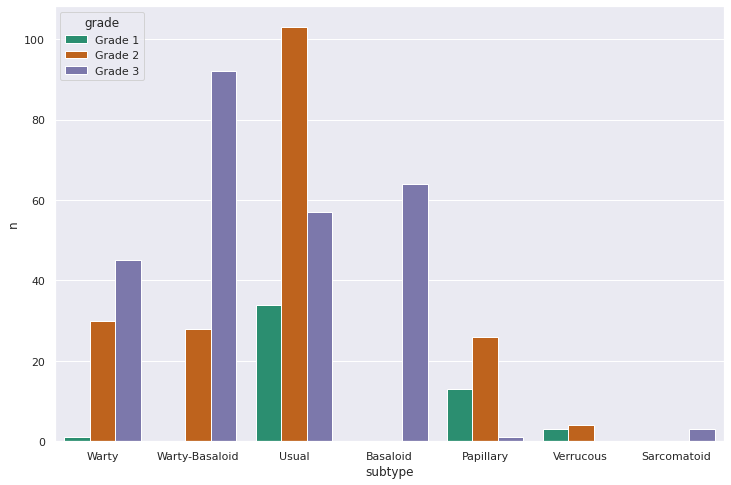

In [77]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='subtype', y='n', hue='grade', estimator=len)
plt.show()

In [78]:
scipy.stats.chi2_contingency(tbl_pivot)

(200.97885182466325,
 2.0480921501804444e-36,
 12,
 array([[  6.47619048,  24.25396825,  33.26984127],
        [  4.04761905,  15.15873016,  20.79365079],
        [  0.30357143,   1.13690476,   1.55952381],
        [ 19.63095238,  73.51984127, 100.84920635],
        [  0.70833333,   2.65277778,   3.63888889],
        [  7.69047619,  28.8015873 ,  39.50793651],
        [ 12.14285714,  45.47619048,  62.38095238]]))

Basaloid and sarcomatoid carcinomas were entirely composed of grade 3 areas. Warty-basaloid and warty carcinomas were composed of predominantly grade 2 and grade 3 areas, while papillary and verrucous carcinoma were composed predominantly of grade 1 and grade 2 areas. Usual squamous cell carcinoma showed the heterogeneous aspect that it most common, with a mixture of histologic grades, predominantly grade 2 areas. This distribution pattern is totally consistent with the typical morphology of penile squamous cell carcinomas regarding histologic subtypes and grades. The association between histologic grade and histologic subtype was statistically significant ($\chi^2 P<0.00001$).

### Histologic subtype and host response

In [79]:
tbl = df.groupby(['subtype', 'host_response'])['n'].count().reset_index()
tbl_pivot = pd.pivot_table(tbl, index='subtype', columns='host_response', values= 'n').fillna(0)
tbl_pivot

host_response,No inflammation,Mild inflammation,Moderate inflammation,Intense inflammation
subtype,,,,
Basaloid,1,12,17,34
Papillary,1,7,14,18
Sarcomatoid,0,0,0,3
Usual,0,36,61,95
Verrucous,0,5,0,2
Warty,1,14,21,41
Warty-Basaloid,1,22,41,57


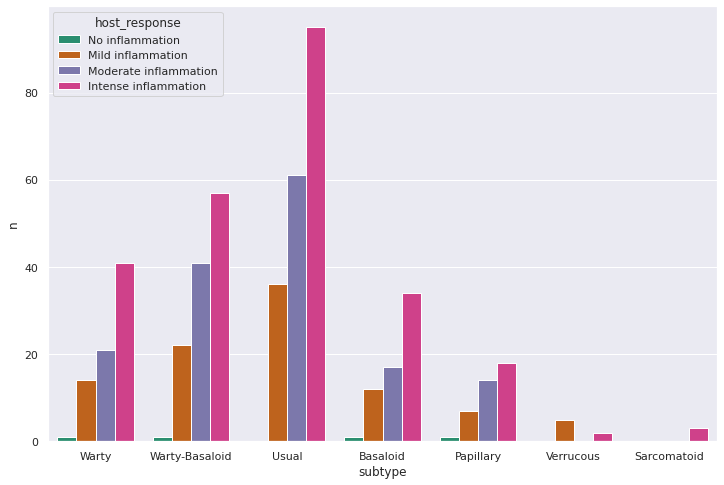

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='subtype', y='n', hue='host_response', estimator=len)
plt.show()

In [81]:
scipy.stats.chi2_contingency(tbl_pivot)

(21.892435086401203,
 0.23679571230095706,
 18,
 array([[5.07936508e-01, 1.21904762e+01, 1.95555556e+01, 3.17460317e+01],
        [3.17460317e-01, 7.61904762e+00, 1.22222222e+01, 1.98412698e+01],
        [2.38095238e-02, 5.71428571e-01, 9.16666667e-01, 1.48809524e+00],
        [1.52380952e+00, 3.65714286e+01, 5.86666667e+01, 9.52380952e+01],
        [5.55555556e-02, 1.33333333e+00, 2.13888889e+00, 3.47222222e+00],
        [6.11111111e-01, 1.46666667e+01, 2.35277778e+01, 3.81944444e+01],
        [9.60317460e-01, 2.30476190e+01, 3.69722222e+01, 6.00198413e+01]]))

Intense inflammation predominanted across histologic subtypes, with a similar pattern observed previously, with no significant differences between host response and histologic subtypes ($\chi^2 P=0.24$).

### Histologic grade and host response

In [82]:
tbl = df.groupby(['grade', 'host_response'])['n'].count().reset_index()
tbl_pivot = pd.pivot_table(tbl, index='grade', columns='host_response', values='n')
tbl_pivot

host_response,No inflammation,Mild inflammation,Moderate inflammation,Intense inflammation
grade,,,,
Grade 1,1,15,18,17
Grade 2,1,36,59,93
Grade 3,2,45,74,137


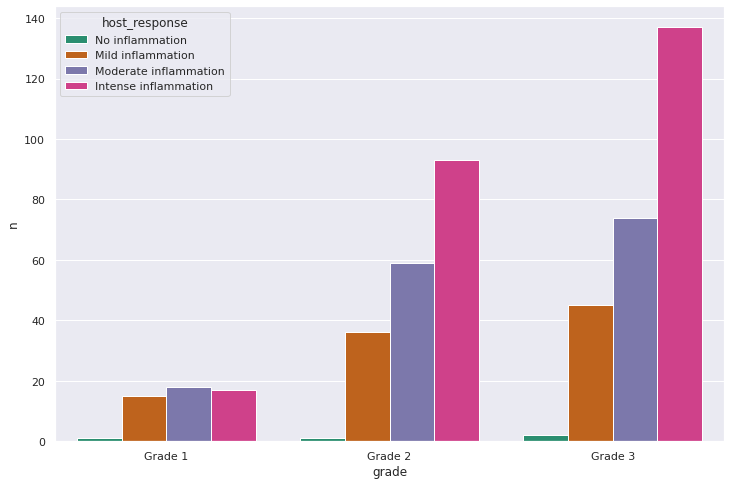

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='grade', y='n', hue='host_response', estimator=len)
plt.show()

In [84]:
scipy.stats.chi2_contingency(tbl_pivot)

(8.26221387698151,
 0.21951540966077826,
 6,
 array([[  0.40963855,   9.8313253 ,  15.46385542,  25.29518072],
        [  1.51807229,  36.43373494,  57.30722892,  93.74096386],
        [  2.07228916,  49.73493976,  78.22891566, 127.96385542]]))

Intense inflammation predominanted in grade 2 and grade 3 tumors, followed by moderate inflammation and mild inflammation. In grade 1 tumors, proportions of mild, moderate and intense inflammation were similar. These differences were not statistically significant ($\chi^2 P=0.22$), indicating no association between histologic grade and host response.

# PD-L1

PD-L1 expression was measured in tumor cells (percentage of positive cells and H-score) and in intratumoral lymphocytes (number of positive cells).

## Overall expression

### Tumor cells (%)

In [85]:
df['pdl1_tumor'].describe().round().to_frame()

,pdl1_tumor
count,504.0
mean,26.0
std,34.0
min,0.0
25%,0.0
50%,5.0
75%,40.0
max,100.0


PD-L1 expression in tumor cells was evaluable in 504 spots. In tumor cells, mean expression was 26%, with a standard deviation of 34%. Median expression was 5%, with an interquartile range of 40%. The minimum value was 0% and the maximum value was 100%.

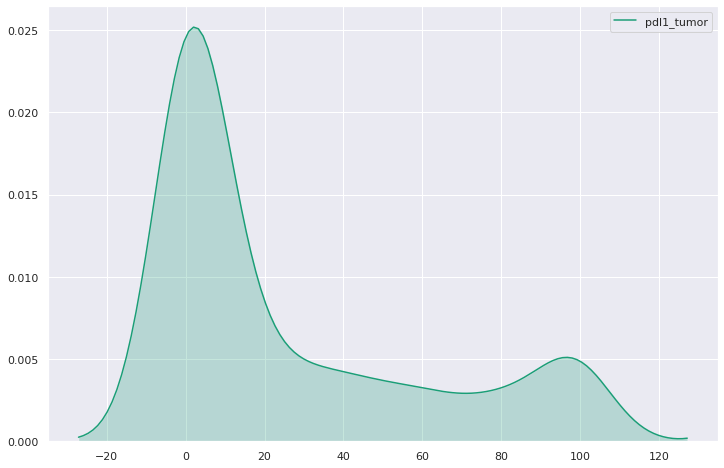

In [86]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['pdl1_tumor'].dropna(), shade=True)
plt.show()

PD-L1 expression in tumor cells shows a marked right-skewed distribution, suggesting that most values were very low. A small peak is noted at higher values. Also, considering this distribution the median and the interquartile range are better measurements for the distribution than the mean and standard deviation.

In [87]:
pdl1_tumor_pos1 = df['pdl1_tumor'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
pdl1_tumor_pos1.value_counts().to_frame()

,pdl1_tumor
Positive,331
Negative,197


Considering 1% as the threshold for PD-L1 positivity, most spots (331) were positive, compared to negative spots (197).

In [88]:
df['pdl1_tumor_location'].value_counts().to_frame()

,pdl1_tumor_location
Cytoplasmic/Membraneous,250
Cytplasmic,81


Two patterns of PD-L1 expression were observed in tumor cells. The predominant pattern was cytoplasmic and membranous (250 spots) with only cytoplasmic expression in the remaining cases (81 spots).

### Tumor cells (H-score)

In [89]:
df['pdl1_tumor_h'].describe().round().to_frame()

,pdl1_tumor_h
count,504.0
mean,36.0
std,60.0
min,0.0
25%,0.0
50%,5.0
75%,50.0
max,300.0


Regarding H-scores, in tumor cells PD-L1 had a mean H-score of 36.4 with a standard deviation of 58.5. Median H-score was 5 and interquartile range was 50. The minimum and maximum values were 0 and 300, respectively.

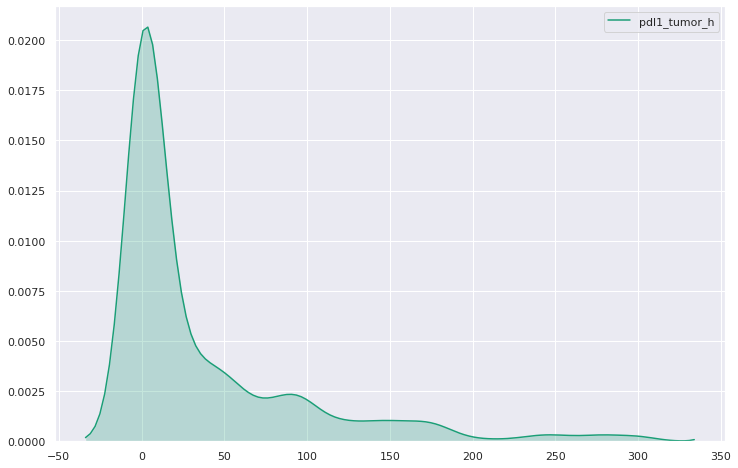

In [90]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['pdl1_tumor_h'].dropna(), shade=True)
plt.show()

The distribution of H-scores showed the same right-skewed shape than with percentages, as expected. Similarly, the median and interquartile range are also better measurements of PD-L1 expression in tumor cells using H-scores.

### Intratumoral lymphocytes

In [91]:
df['pdl1_lymph'].describe().round().to_frame()

,pdl1_lymph
count,497.0
mean,7.0
std,10.0
min,0.0
25%,1.0
50%,5.0
75%,10.0
max,70.0


PD-L1 expression in intratumoral lymphocytes was evaluable in 497 spots. In intratumoral lymphocytes, PD-L1 positivity was observed in a mean of 7 lymphocytes, with a standard deviation of 10 lymphocytes. The median number of positive PD-L1 intratumoral lymphocytes was 5, with an interquartile range of 9 lymphocytes. The minimum and maximum number of positive lymphocytes were 0 and 70, respectively.

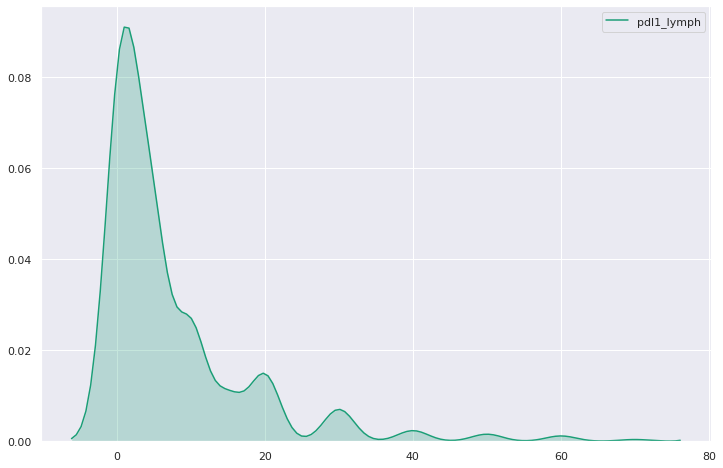

In [92]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['pdl1_lymph'].dropna(), shade=True)
plt.show()

The distribution of PD-L1 in intratumoral lymphocytes was right-skewed, similar to the distribution observed for PD-L1 expression in tumor cells.

### Tumor cells vs intratumoral lymphocytes

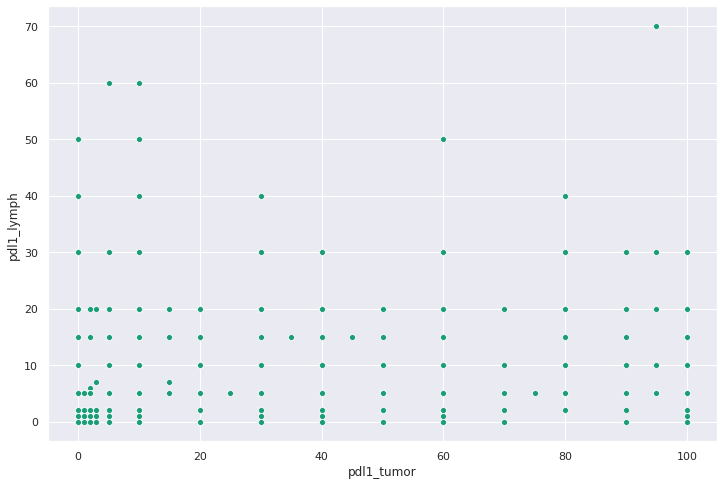

In [93]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='pdl1_tumor', y='pdl1_lymph')
plt.show()

In [94]:
tbl = df[['pdl1_tumor', 'pdl1_lymph']].dropna()
scipy.stats.spearmanr(tbl['pdl1_tumor'], tbl['pdl1_lymph'])

SpearmanrResult(correlation=0.47488302809363037, pvalue=2.545391466655867e-29)

A scatterplot of PD-L1 expression in tumor cells and in intratumoral lymphocytes showed an apparent positive association. This positive association was confirmed using Spearman's correlation test, which showed a statistically significant, moderate positive correlation ($\rho=0.47, P<0.0001$).

## Histologic subtype

### Tumor cells (%)

In [95]:
df.groupby('subtype')['pdl1_tumor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Basaloid,64.0,32.0,32.0,0.0,0.0,25.0,50.0,100.0
Papillary,40.0,1.0,4.0,0.0,0.0,0.0,0.0,20.0
Sarcomatoid,3.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Usual,192.0,25.0,35.0,0.0,0.0,5.0,50.0,100.0
Verrucous,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warty,77.0,15.0,23.0,0.0,0.0,5.0,20.0,90.0
Warty-Basaloid,121.0,37.0,39.0,0.0,2.0,20.0,80.0,100.0


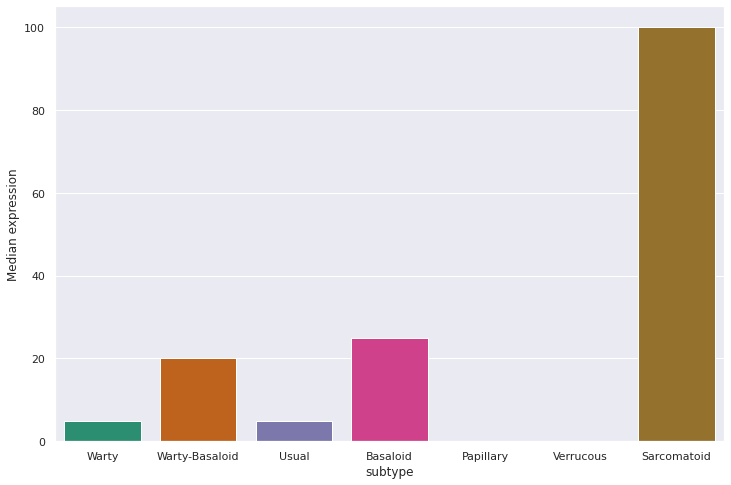

In [96]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='subtype', y='pdl1_tumor', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

When consider percentage of positive cells, higher expression of PD-L1 in tumor cells were noted for the sarcomatoid, basaloid and warty-basaloid subtypes (median of 100%, 25% and 20%, respectively). Low expression levels were noted in the usual and warty subtypes (5%), while the median expression was 0% for the papillary and verrucous subtypes.

### Tumor cells (H-score)

In [97]:
df.groupby('subtype')['pdl1_tumor_h'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Basaloid,64.0,36.0,39.0,0.0,0.0,28.0,50.0,150.0
Papillary,40.0,1.0,5.0,0.0,0.0,0.0,0.0,25.0
Sarcomatoid,3.0,293.0,12.0,280.0,290.0,300.0,300.0,300.0
Usual,192.0,38.0,60.0,0.0,0.0,5.0,56.0,280.0
Verrucous,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Warty,77.0,16.0,25.0,0.0,0.0,5.0,20.0,100.0
Warty-Basaloid,121.0,55.0,71.0,0.0,2.0,20.0,90.0,300.0


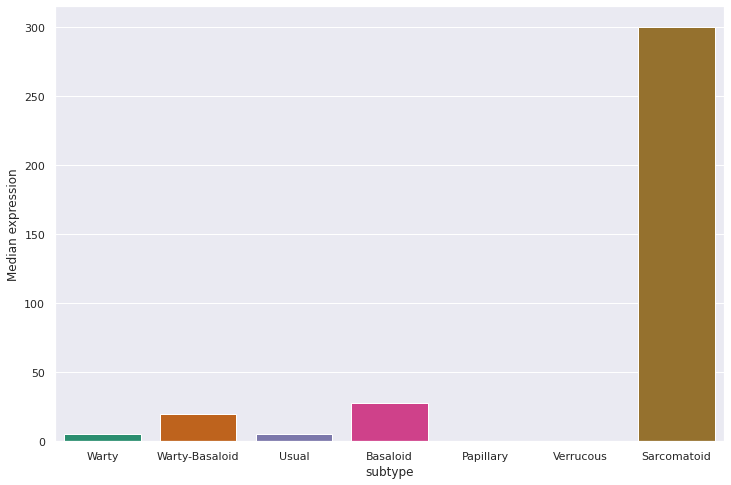

In [98]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='subtype', y='pdl1_tumor_h', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

The pattern of PD-L1 expression in tumor cells when using H-scores was similar to the expression pattern when using percentage of positive tumor cells.

### Intratumoral lymphocytes

In [99]:
df.groupby('subtype')['pdl1_lymph'].describe().round()

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Basaloid,63.0,9.0,12.0,0.0,2.0,5.0,10.0,60.0
Papillary,37.0,3.0,4.0,0.0,0.0,2.0,5.0,20.0
Sarcomatoid,3.0,18.0,10.0,10.0,12.0,15.0,22.0,30.0
Usual,192.0,9.0,12.0,0.0,1.0,5.0,10.0,70.0
Verrucous,7.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
Warty,75.0,6.0,9.0,0.0,0.0,5.0,6.0,40.0
Warty-Basaloid,120.0,6.0,8.0,0.0,1.0,5.0,10.0,50.0


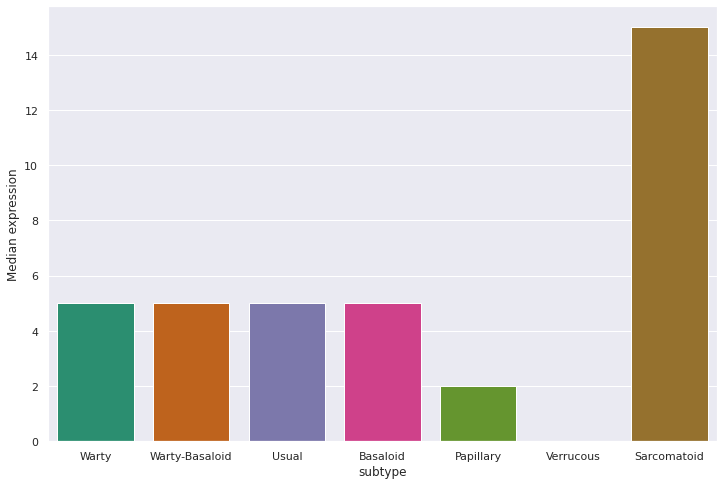

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='subtype', y='pdl1_lymph', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

Regarding the association of histologic subtypes and PD-L1 expression in intratumoral lymphocytes, a pattern similar to PD-L1 expression in tumor cells was observed.

## Histologic grade

### Tumor cells (%)

In [101]:
df.groupby('grade')['pdl1_tumor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,51.0,8.0,21.0,0.0,0.0,0.0,5.0,90.0
Grade 2,189.0,21.0,34.0,0.0,0.0,1.0,30.0,100.0
Grade 3,258.0,32.0,36.0,0.0,1.0,15.0,60.0,100.0


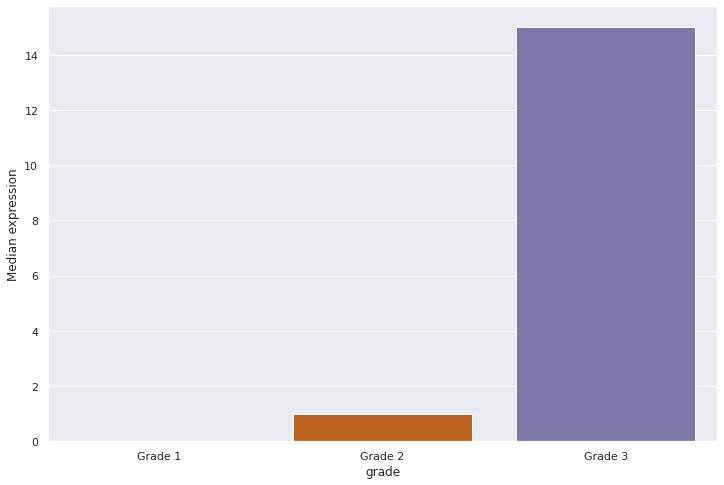

In [102]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='grade', y='pdl1_tumor', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

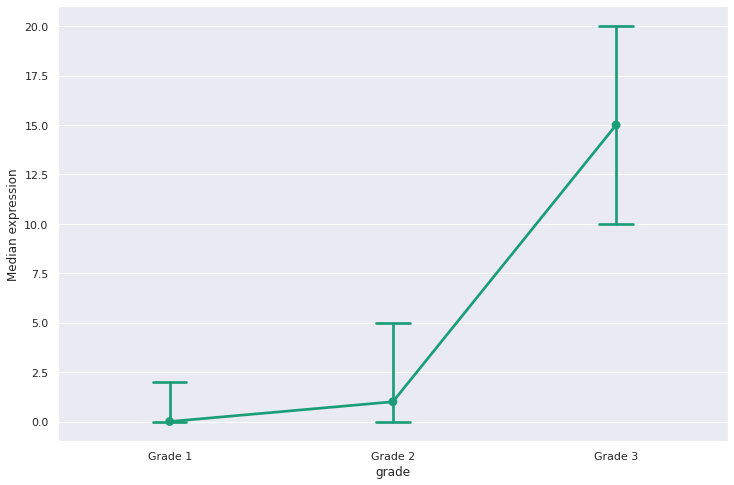

In [103]:
plt.figure(figsize=(12,8))
sns.pointplot(data=df, x='grade', y='pdl1_tumor', capsize=0.15, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

In [104]:
scipy.stats.kruskal(*[dataframe['pdl1_tumor'].values for name, dataframe in df.groupby('grade')], nan_policy='omit')

KruskalResult(statistic=45.007819501150415, pvalue=1.685295938205074e-10)

Percentage of positive PD-L1 tumor cells increased from grade 1 to grade 2 to grade 3 tumors (median of 0%, 1% and 15%), suggesting an association between PD-L1 positivity in tumor cells and histologic grade. The Kruskal-Wallis test yielded a P value < 0.0001, indicating that the percentage differences were unlikely to be seen by chance alone.

### Tumor cells (H-score)

In [105]:
df.groupby('grade')['pdl1_tumor_h'].describe().round()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,51.0,12.0,35.0,0.0,0.0,0.0,5.0,160.0
Grade 2,189.0,29.0,51.0,0.0,0.0,1.0,35.0,250.0
Grade 3,258.0,47.0,67.0,0.0,1.0,18.0,64.0,300.0


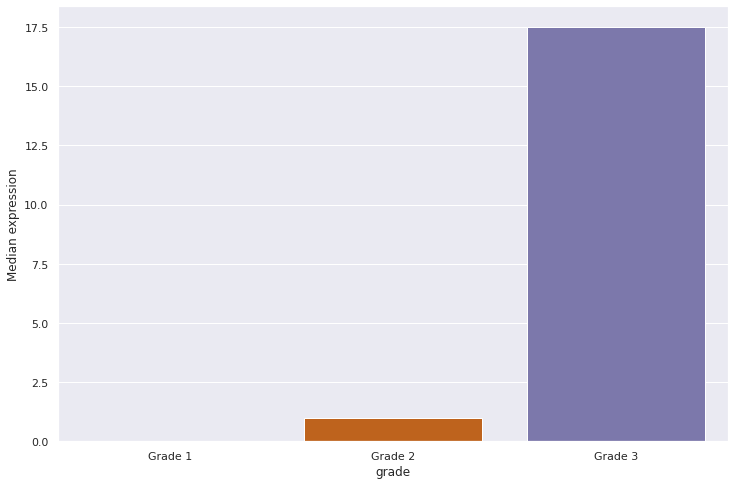

In [106]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='grade', y='pdl1_tumor_h', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

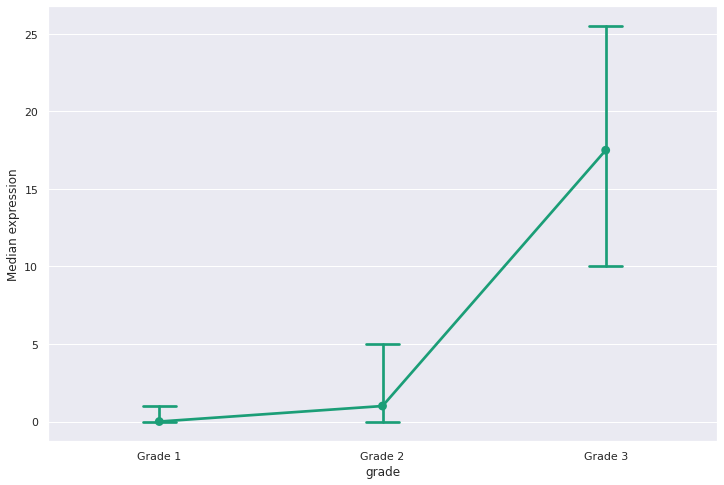

In [107]:
plt.figure(figsize=(12,8))
sns.pointplot(data=df, x='grade', y='pdl1_tumor_h', capsize=0.15, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

In [108]:
scipy.stats.kruskal(*[dataframe['pdl1_tumor_h'].values for name, dataframe in df.groupby('grade')], nan_policy='omit')

KruskalResult(statistic=44.18165477974459, pvalue=2.547273420023182e-10)

A similar pattern of PD-L1 expression measured by H-score and histologic grades was also observed, from a median of 0 points (grade 1) to 1 point (grade 2) to 18 points (grade 3). These differences were statistically significant (P<0.0001).

### Intratumoral lymphocytes

In [109]:
df.groupby('grade')['pdl1_lymph'].describe().round()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,48.0,9.0,14.0,0.0,1.0,2.0,6.0,60.0
Grade 2,187.0,6.0,9.0,0.0,0.0,2.0,8.0,60.0
Grade 3,256.0,8.0,11.0,0.0,1.0,5.0,10.0,70.0


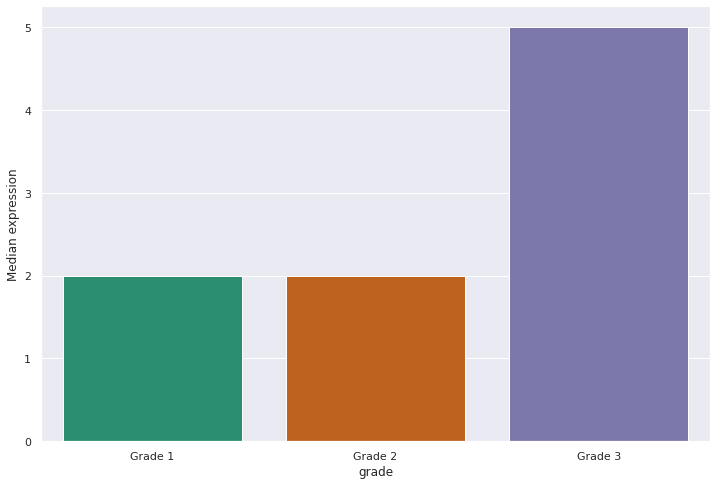

In [110]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='grade', y='pdl1_lymph', ci=None, estimator=np.median)
plt.ylabel('Median expression')
plt.show()

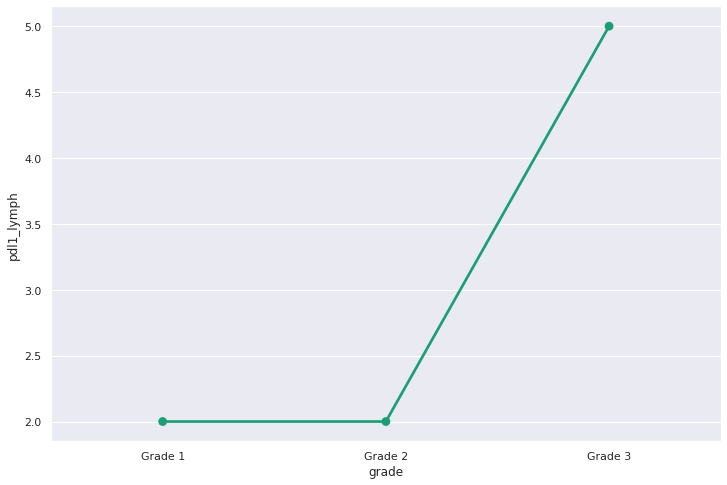

In [111]:
plt.figure(figsize=(12,8))
sns.pointplot(data=df, x='grade', y='pdl1_lymph', estimator=np.median, ci=None)
plt.show()

In [112]:
scipy.stats.kruskal(*[dataframe['pdl1_lymph'].values for name, dataframe in df.groupby('grade')], nan_policy='omit')

KruskalResult(statistic=8.572216344872485, pvalue=0.013758366427775618)

A similar trend was observed between histologic grade and PD-L1 expression in intratumoral lymphocytes, but to a lesser degree of statistical significance (P=0.01).

## Host response

### Tumor cells (%)

In [113]:
df.groupby('host_response')['pdl1_tumor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No inflammation,4.0,25.0,50.0,0.0,0.0,0.0,25.0,100.0
Mild inflammation,96.0,16.0,27.0,0.0,0.0,1.0,20.0,100.0
Moderate inflammation,154.0,19.0,30.0,0.0,0.0,2.0,20.0,100.0
Intense inflammation,250.0,34.0,37.0,0.0,0.0,15.0,60.0,100.0


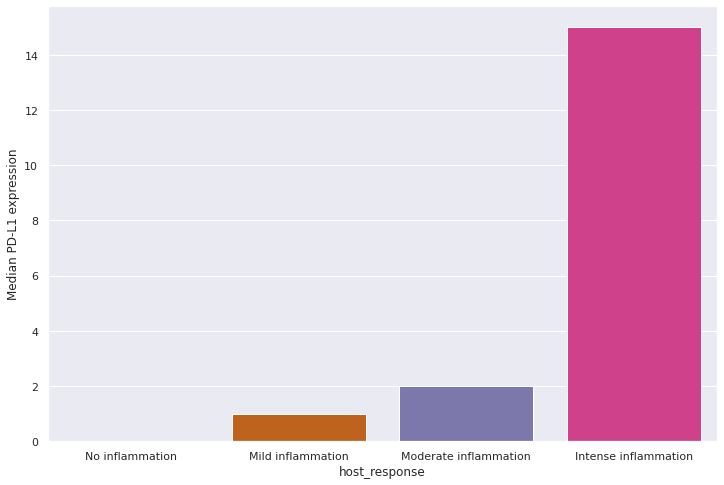

In [114]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='host_response', y='pdl1_tumor', ci=None, estimator=np.median)
plt.ylabel('Median PD-L1 expression')
plt.show()

In [115]:
scipy.stats.kruskal(*[dataframe['pdl1_tumor'].values for name, dataframe in df.groupby('host_response')], na_policy='omit')

KruskalResult(statistic=26.767222082827473, pvalue=6.587391320445661e-06)

Median percentage of PD-L1 positive tumors cells increased from mild to intense inflammation. Median PD-L1 positive tumors cells was 0% when no inflammation was seen, 1% with mild inflammation, 2% with moderate inflammation and 15% with intense inflammation. This assocation was statistically significant (Kruskal-Wallis $P<0.0001$).

### Tumor cells (H-score)

In [116]:
df.groupby('host_response')['pdl1_tumor_h'].describe().round()

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No inflammation,4.0,75.0,150.0,0.0,0.0,0.0,75.0,300.0
Mild inflammation,96.0,20.0,36.0,0.0,0.0,1.0,20.0,150.0
Moderate inflammation,154.0,26.0,51.0,0.0,0.0,2.0,26.0,280.0
Intense inflammation,250.0,49.0,66.0,0.0,0.0,18.0,80.0,300.0


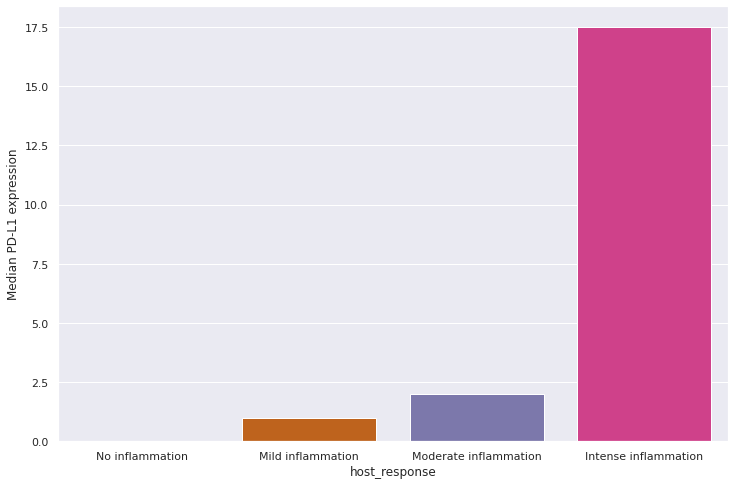

In [117]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='host_response', y='pdl1_tumor_h', ci=None, estimator=np.median)
plt.ylabel('Median PD-L1 expression')
plt.show()

In [118]:
scipy.stats.kruskal(*[dataframe['pdl1_tumor_h'].values for name, dataframe in df.groupby('host_response')], na_policy='omit')

KruskalResult(statistic=26.174458893000626, pvalue=8.767967966353224e-06)

H-scores of PD-L1 expression tumor cells showed a similar pattern than with percentage of PD-L1 positive cells. Increasing median scores were associated with increasing levels of inflammation. The median H-score was 0 when no inflammation was seen, 1 in mild inflammation, 2 in moderate inflammation and 18 in intense inflammation. This association was statistically significant (Kruskal-Wallis $P < 0.0001$).

### Intratumoral lymphocytes

In [119]:
df.groupby('host_response')['pdl1_lymph'].describe().round()

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No inflammation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mild inflammation,93.0,4.0,10.0,0.0,0.0,1.0,2.0,70.0
Moderate inflammation,154.0,4.0,5.0,0.0,1.0,2.0,5.0,30.0
Intense inflammation,250.0,11.0,12.0,0.0,2.0,5.0,15.0,60.0


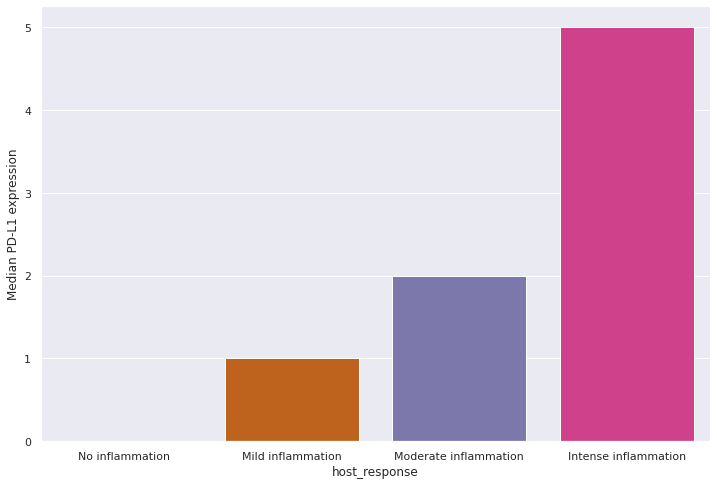

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='host_response', y='pdl1_lymph', ci=None, estimator=np.median)
plt.ylabel('Median PD-L1 expression')
plt.show()

In [121]:
scipy.stats.kruskal(*[dataframe['pdl1_lymph'].values for name, dataframe in df.groupby('host_response')], nan_policy='omit')

KruskalResult(statistic=89.73945673867456, pvalue=2.491824413429132e-19)

Median number of PD-L1 positive intratumoral lymphocytes increased from mild to intense inflammation. No PD-L1 positive intratumoral lymphocytes were identified when no inflammation was seen. Median number of PD-L1 positive intratumoral lymphocytes was 1% with mild inflammation, 2% with moderate inflammation and 5% with intense inflammation. This assocation was statistically significant (Kruskal-Wallis $P<0.0001$).

## Impact of pathologic features

To determine the impact that the evaluated pathologic features has on PDL1 expresion, machine learning linear models were built using PD-L1 expression as the target and histologic subtype, histologic grade and host response as features. The adjusted $R^2$ was used as a measure of the impact (explanatory power) for the pathologic features in PD-L1 expression in tumor cells (percentage and H-score) and intratumoral lymphocytes (N). For each scenario, 3 models were built: M1) histologic grade alone; M2) histologic grade + histologic subtype; M3) histologic grade + histologic subtype + host response.

In [122]:
# Function to calculate adjusted R2. It returns R2 and adjusted R2
def r2_adj(x, y):
    r2 = reg.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return r2, adjusted_r2

### Tumor cells (%)

In [123]:
# Selecting the target and features
df_ml = df[['pdl1_tumor', 'grade', 'subtype', 'host_response']].dropna()
y = df_ml['pdl1_tumor']
x_m1 = df_ml['grade']
x_m2 = df_ml[['grade', 'subtype']]
x_m3 = df_ml[['grade', 'subtype', 'host_response']]

# Creating dummy variables for features
x_m1 = pd.get_dummies(x_m1, drop_first=True)
x_m2 = pd.get_dummies(x_m2, drop_first=True)
x_m3 = pd.get_dummies(x_m3, drop_first=True)

In [124]:
# Only histologic grade
reg = LinearRegression()
reg.fit(x_m1, y)
r2_adj(x_m1, y)

(0.052973569136934184, 0.0491471997193057)

In [125]:
# Histologic grade + histologic subtype
reg.fit(x_m2, y)
r2_adj(x_m2, y)

(0.13690865177492895, 0.12278854791848604)

In [126]:
# Histologic grade + histologic subtype + host response
reg.fit(x_m3, y)
r2_adj(x_m3, y)

(0.17984303824860315, 0.16127981483447684)

For percentages of PD-L1 in tumor cells, histologic grade explains 4.9% of the variability. When histologic subtype is combined with histologic grade, both features explain 12.2% of the variability in PD-L1 expression in tumor cells. Finally, when host response is added, the 3 features explain 16.1% of the variability. Thus, all the considered pathologic features have a significant impact in PD-L1 expression.

### Tumor cells (H-score)

In [127]:
# Selecting the target and features
df_ml = df[['pdl1_tumor_h', 'grade', 'subtype', 'host_response']].dropna()
y = df_ml['pdl1_tumor_h']
x_m1 = df_ml['grade']
x_m2 = df_ml[['grade', 'subtype']]
x_m3 = df_ml.drop('pdl1_tumor_h', axis=1)

# Creating dummy variables
x_m1 = pd.get_dummies(x_m1, drop_first=True)
x_m2 = pd.get_dummies(x_m2, drop_first=True)
x_m3 = pd.get_dummies(x_m3, drop_first=True)

In [128]:
# Only histologic grade
reg.fit(x_m1, y)
r2_adj(x_m1, y)

(0.04064603194301786, 0.036769854294302795)

In [129]:
# Histologic grade + histologic subtype
reg.fit(x_m2, y)
r2_adj(x_m2, y)

(0.20108172270504532, 0.18801148503968823)

In [130]:
# Histologic grade + histologic subtype + host response
reg.fit(x_m3, y)
r2_adj(x_m3, y)

(0.237255464504598, 0.21999169929791196)

For H-scores of PD-L1 in tumor cells, histologic grade explains 3.7% of the variability. When histologic subtype is combined with histologic grade, both features explain 18.8% of the variability in PD-L1 expression in tumor cells. Finally, when host response is added, the 3 features explain 22% of the variability. Thus, all the considered pathologic features have a significant impact in PD-L1 expression.

### Intratumoral lymphocytes

In [131]:
# Selecting the target and the features
df_ml = df[['pdl1_lymph', 'grade', 'subtype', 'host_response']].dropna()
y = df_ml['pdl1_lymph']
x_m1 = df_ml['grade']
x_m2 = df_ml[['grade', 'subtype']]
x_m3 = df_ml.drop('pdl1_lymph', axis=1)

# Creating dummy variables
x_m1 = pd.get_dummies(x_m1, drop_first=True)
x_m2 = pd.get_dummies(x_m2, drop_first=True)
x_m3 = pd.get_dummies(x_m3, drop_first=True)

In [132]:
# Only histologic grade
reg.fit(x_m1, y)
r2_adj(x_m1, y)

(0.012845784802866802, 0.0088000708061573)

In [133]:
# Histologic grade + histologic subtype
reg.fit(x_m2, y)
r2_adj(x_m2, y)

(0.0516592936526592, 0.035919198941500086)

In [134]:
# Histologic grade + histologic subtype + host response
reg.fit(x_m3, y)
r2_adj(x_m3, y)

(0.14922975689183737, 0.12969223565135768)

For number of PD-L1 positive intratumoral lymphocytes, histologic grade explains 0.1% of the variability. When histologic subtype is combined with histologic grade, both features explain 3.6% of the variability in PD-L1 expression in tumor cells. Finally, when host response is added, the 3 features explain 13% of the variability. Thus, all the considered pathologic features have a significant impact in PD-L1 expression.